# ILab2

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load data

## Bitcoin

In [ ]:
BITC_BITFINIX_url = "https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Bitcoin/BITFINEX_BTCUSD%2C%201D.csv"

bitcoin_daily = pd.read_csv (BITC_BITFINIX_url)

### Ethereum

In [ ]:
ETHERIUM_BITFINIX_url= 'https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Ethereum/BITFINEX_ETHUSD%2C%201D.csv'

In [ ]:
ethereum_daily = pd.read_csv(ETHERIUM_BITFINIX_url) 

### Ripple 

In [ ]:
RIPPLE_BITFINIX_url= 'https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Ripple/BITFINEX_XRPUSD%2C%201D.csv'

In [ ]:
ripple_daily = pd.read_csv(RIPPLE_BITFINIX_url)

## Subset DF

## Subset DF

In [ ]:
bit_bit = bitcoin_daily[['time','open', 'close', 'Volume']]
bit_bit = bit_bit.rename(columns={'open': 'BTC_open', 'close': 'BTC_close', 'Volume': 'BTC_vol'})

In [ ]:
eth_bit = ethereum_daily[['time','open', 'close', 'Volume']]
eth_bit = eth_bit.rename(columns={'open': 'ETHER_open', 'close': 'ETHER_close', 'Volume': 'ETHER_vol'})

In [ ]:
xrp_bit = ripple_daily[['time','open', 'close', 'Volume']]
xrp_bit = xrp_bit.rename(columns={'open': 'XRP_open', 'close': 'XRP_close', 'Volume': 'XRP_vol'})

## Merge



In [ ]:
# Data frames for each coin from BITFINEX
#bit_bit 2,677 observations
#eth_bit 1,497 observations
#xrp_bit 1,176 observations

In [ ]:
bit_eth = pd.merge(bit_bit, eth_bit, how='left', on=['time'])
data = pd.merge(bit_eth, xrp_bit, how='left', on=['time'])

In [ ]:
#Drop NA 
data = data.dropna()
len(data) #1,174 observations after removing NA

1174

# Lag the predictor variables 7 days

In [ ]:
# Duplicate the bitcoin variables before lagging
data['BTC_open_dup'] = data['BTC_open'] 
data['BTC_close_dup'] = data['BTC_close']
data['BTC_vol_dup'] = data['BTC_vol']

In [ ]:
# Remove the BTC open and BTC vol variables before lagging as they  can't be used for this type of modelling strategy. 
data = data.drop(['BTC_open', 'BTC_vol'], axis = 1)

In [ ]:
# Lag all variables except BTC_close

data['ETHER_open'] = data['ETHER_open'].shift(7)
data['ETHER_close'] = data['ETHER_close'].shift(7)
data['ETHER_vol'] = data['ETHER_vol'].shift(7)

data['XRP_open'] = data['XRP_open'].shift(7)
data['XRP_close'] = data['XRP_close'].shift(7)
data['XRP_vol'] = data['XRP_vol'].shift(7)

data['BTC_open_dup'] = data['BTC_open_dup'].shift(7)
data['BTC_close_dup'] = data['BTC_close_dup'].shift(7)
data['BTC_vol_dup'] = data['BTC_vol_dup'].shift(7)

In [ ]:
# Drop the first 7 rows of the data set as these are NA rows due to the lagging. 
data.drop(data.head(7).index, inplace=True)

# Set the test and train sets

In [ ]:
# Set the  data index as a data col
data.index = range(1,1168)

In [ ]:
# May train and test sets
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_may = data[1:1071]
test_may = data[1071:1078]

In [ ]:
# July train and test sets
train_july = data[1:1132]
test_july = data[1132:1139]

In [ ]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_may = train_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_may = train_may['BTC_close']

# Setup testing x and y variables
x_test_may = test_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_may = test_may['BTC_close']


In [ ]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for JULY
x_train_july = train_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_july = train_july['BTC_close']

# Setup testing x and y variables
x_test_july = test_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_july = test_july['BTC_close']


# May Predictions

## Random Forest - May

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Random Forest tunning 
RandomForestRegression = RandomForestRegressor(n_estimators=500)

In [ ]:
RandomForestRegression.fit(x_train_may, y_train_may)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_prediction = RandomForestRegression.predict(x_test_may)
rf_prediction = pd.DataFrame(rf_prediction)
rf_prediction.columns = ['Random Forest']
rf_prediction['index'] = range(1,8)
rf_prediction

,Random Forest,index
0,7936.989186,1
1,8019.186852,2
2,7452.740787,3
3,7051.867704,4
4,7493.764370,5
5,8325.301589,6
6,7776.840938,7


In [ ]:
y_test_may = pd.DataFrame(y_test_may)
y_test_may['index'] = range(1,8)
y_test_may.columns = ['Real', 'index']

In [ ]:
merge_may = y_test_may.merge(rf_prediction, on="index")

In [ ]:
rf_mse = mean_squared_error(y_test_may, rf_prediction)
rf_mse

rf_rmse = np.sqrt(rf_mse)
rf_rmse

1033.8083421788137

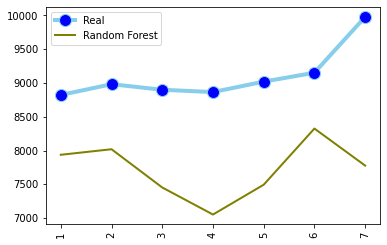

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Random Forest', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

## Linear Model - May

In [ ]:
# Import the requried packages for the linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_may, y_train_may)

In [ ]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_may,x_train_may).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              7349.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):                        0.00
Time:                        06:45:37   Log-Likelihood:                         -8884.2
No. Observations:                1070   AIC:                                  1.779e+04
Df Residuals:                    1061   BIC:                                  1.783e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open        1.4739      1.683      0.876      0.381      -1.828       4.776
ETHER_close      -2.3614      1.689     -1.398      0.162      -5.675       0.952
ETHER_vol        -0.0003      0.000     -1.483      0.138      -0.001    9.76e-05
XRP_open      -3414.9582    740.255     -4.613      0.000   -4867.488   -1962.429
XRP_close      2925.4715    753.450      3.883      0.000    1447.051    4403.892
XRP_vol       -1.277e-06   6.51e-07     -1.961      0.050   -2.56e-06    7.72e-10
BTC_open_dup      0.1394      0.098      1.424      0.155      -0.053       0.331
BTC_close_dup     0.8844      0.097      9.096      0.000       0.694       1.075
BTC_vol_dup       0.0159      0.002      8.325      0.000       0.012       0.020
==============================================================================
Omnibus:                      147.067   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1727.920
Skew:                           0.009   Prob(JB):                         0.00
Kurtosis:                       9.225   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Predict the model on the x_test data
y_pred_may = pd.DataFrame(model.predict(x_test_may))
y_pred_may['index'] = range(1,8)
y_pred_may

,0,index
0,7626.086948,1
1,7526.599476,2
2,7690.725950,3
3,7793.804550,4
4,7850.899369,5
5,8888.264968,6
6,8836.952715,7


In [ ]:
y_test_may = pd.DataFrame(y_test_may)[0:7]
y_test_may['index'] = range(1,8)
y_test_may

,Real,index
1072,8822.800000,1
1073,8982.300000,2
1074,8899.800000,3
1075,8865.800000,4
1076,9020.100000,5
1077,9152.470993,6
1078,9979.600000,7


In [ ]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may, on='index', how='left')
merge_may

,Real,index,Random Forest,0
0,8822.800000,1,7936.989186,7626.086948
1,8982.300000,2,8019.186852,7526.599476
2,8899.800000,3,7452.740787,7690.725950
3,8865.800000,4,7051.867704,7793.804550
4,9020.100000,5,7493.764370,7850.899369
5,9152.470993,6,8325.301589,8888.264968
6,9979.600000,7,7776.840938,8836.952715


In [ ]:
merge_may.columns = ['Real', 'index', 'Random Forest', 'Linear Regression']

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_true = merge_may.Real, y_pred = merge_may['Linear Regression'])
np.sqrt(MSE)

1127.8739928245245

In [ ]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_may, y_train_may)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8933358021588513


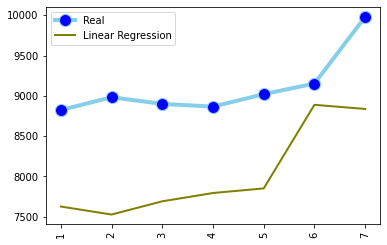

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Linear Regression', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

## Support Vector Regression - May

In [ ]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
y_train_may = pd.DataFrame(y_train_may)

In [ ]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_may)
y = sc_y.fit_transform(y_train_may)

In [ ]:
y = y[:, 0]

In [ ]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'poly')
SVR_reg = svr_regressor.fit(X, y)

In [ ]:
# Predict the model on the x_test data
x_test_may = sc_X.fit_transform(x_test_may)

y_pred_may_svr = SVR_reg.predict(x_test_may)
y_pred_may_svr = sc_y.inverse_transform(y_pred_may_svr) 

y_pred_may_svr = pd.DataFrame(y_pred_may_svr)
y_pred_may_svr['index'] = range(1,8)

In [ ]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_svr, on='index', how='left')

In [ ]:
merge_may

,Real,index,Random Forest,Linear Regression,0
0,8822.800000,1,7936.989186,7626.086948,6233.990297
1,8982.300000,2,8019.186852,7526.599476,6457.953900
2,8899.800000,3,7452.740787,7690.725950,6479.903842
3,8865.800000,4,7051.867704,7793.804550,6640.965524
4,9020.100000,5,7493.764370,7850.899369,6510.529127
5,9152.470993,6,8325.301589,8888.264968,7965.608332
6,9979.600000,7,7776.840938,8836.952715,14049.828929


In [ ]:
merge_may.columns = ['Real', 'index', 'Random Forest', 'Linear Regression', 'Support Vector Regression']

In [ ]:
#merge_may['Avg'] = (merge_may['lm_prediction'] + merge_may['random_forest']) / 2

#merge_may

In [ ]:
MSE = mean_squared_error(y_true = merge_may.Real, y_pred = merge_may['Support Vector Regression'])
np.sqrt(MSE)

2622.7955982329245

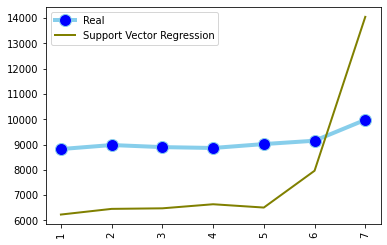

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Support Vector Regression', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

## Vanilla Neural Network - May

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardise the two data sets as a neural network requires standardised data

scaled_X_train = scale(x_train_may)
scaled_X_test = scale(x_test_may)

In [ ]:
# Set the seed for the modelling exercises in order to get reproducible results

tf.random.set_seed(168)
np.random.seed(168)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Create a sequential model 
model = tf.keras.Sequential()

In [ ]:
# create the architecture for the neural network
layer1 = Dense(128, activation='relu', input_shape=[9])

layer2 = Dense(128, activation='relu')

layer3 = Dense(128, activation='relu')

top_layer = Dense(1)

In [ ]:
# Add the layers into the model

model.add(layer1)
model.add(Dropout(0.5))
model.add(layer2)
model.add(Dropout(0.5))
model.add(layer3)
model.add(Dropout(0.5))
model.add(top_layer)

In [ ]:
# Specify the optimizer to be used during the back propgation
optimizer = tf.keras.optimizers.Adam(0.0001)

In [ ]:
# Compile the model architecture

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [ ]:
# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [ ]:
history = model.fit(scaled_X_train, y_train_may, epochs=250, validation_split = 0.3)

Epoch 1/250
24/24 [==============================] - 0s 8ms/step - loss: 51912752.0000 - val_loss: 80201336.0000
Epoch 2/250
24/24 [==============================] - 0s 3ms/step - loss: 51909476.0000 - val_loss: 80198656.0000
Epoch 3/250
24/24 [==============================] - 0s 3ms/step - loss: 51904596.0000 - val_loss: 80195320.0000
Epoch 4/250
24/24 [==============================] - 0s 3ms/step - loss: 51899964.0000 - val_loss: 80190928.0000
Epoch 5/250
24/24 [==============================] - 0s 3ms/step - loss: 51893492.0000 - val_loss: 80184992.0000
Epoch 6/250
24/24 [==============================] - 0s 3ms/step - loss: 51884320.0000 - val_loss: 80176928.0000
Epoch 7/250
24/24 [==============================] - 0s 3ms/step - loss: 51872888.0000 - val_loss: 80165608.0000
Epoch 8/250
24/24 [==============================] - 0s 3ms/step - loss: 51856164.0000 - val_loss: 80149896.0000
Epoch 9/250
24/24 [==============================] - 0s 3ms/step - loss: 51830636.0000 - val_los

In [ ]:
# Make a prediction
preds = model.predict(scaled_X_test)

In [ ]:
preds = pd.DataFrame(preds)
preds['index'] = range(1,8)
preds.columns = ['Vanilla Neural Network', 'index']
preds

,Vanilla Neural Network,index
0,6611.975586,1
1,5955.514648,2
2,6505.468750,3
3,6887.428711,4
4,6012.340820,5
5,7930.229004,6
6,10340.980469,7


In [ ]:
merge_may = merge_may.merge(preds, on = 'index')
merge_may

,Real,index,Random Forest,Linear Regression,Support Vector Regression,Vanilla Neural Network
0,8822.800000,1,7936.989186,7626.086948,6233.990297,6611.975586
1,8982.300000,2,8019.186852,7526.599476,6457.953900,5955.514648
2,8899.800000,3,7452.740787,7690.725950,6479.903842,6505.468750
3,8865.800000,4,7051.867704,7793.804550,6640.965524,6887.428711
4,9020.100000,5,7493.764370,7850.899369,6510.529127,6012.340820
5,9152.470993,6,8325.301589,8888.264968,7965.608332,7930.229004
6,9979.600000,7,7776.840938,8836.952715,14049.828929,10340.980469


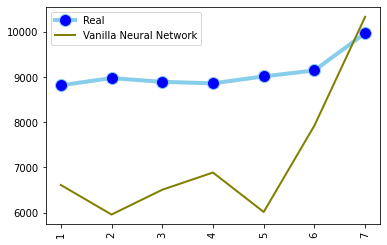

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Vanilla Neural Network', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

In [ ]:
MSE = mean_squared_error(y_true = merge_may.Real, y_pred = merge_may['Vanilla Neural Network'])
np.sqrt(MSE)

2215.7564285139047

#July Predictions

## Random Forest - July

In [ ]:
RandomForestRegression.fit(x_train_july, y_train_july)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_prediction_july = RandomForestRegression.predict(x_test_july)
rf_prediction_july = pd.DataFrame(rf_prediction_july)
rf_prediction_july.columns = ['Random Forest']
rf_prediction_july['index'] = range(1,8)
rf_prediction_july

,Random Forest,index
0,9358.556615,1
1,9355.105595,2
2,9040.928148,3
3,9310.468898,4
4,9225.886957,5
5,9221.871196,6
6,9154.202517,7


In [ ]:
y_test_july = pd.DataFrame(y_test_july)
y_test_july['index'] = range(1,8)
y_test_july.columns = ['Real', 'index']
y_test_july

,Real,index
1133,9239.900000,1
1134,9100.000000,2
1135,9073.200000,3
1136,9147.700000,4
1137,9084.284734,5
1138,9361.100000,6
1139,9267.514949,7


In [ ]:
merge_july = y_test_july.merge(rf_prediction_july, on = 'index')

In [ ]:
rf_mse = mean_squared_error(merge_july.Real, merge_july['Random Forest'])
rf_mse

rf_rmse = np.sqrt(rf_mse)
rf_rmse

150.69790027949435

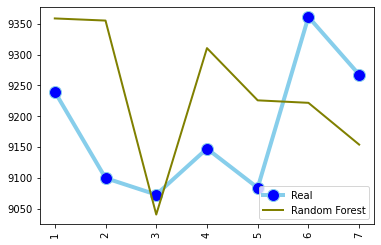

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Random Forest', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

## Linear Model - July

In [ ]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_july, y_train_july)

In [ ]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_july,x_train_july).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8241.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):                        0.00
Time:                        06:48:07   Log-Likelihood:                         -9371.7
No. Observations:                1131   AIC:                                  1.876e+04
Df Residuals:                    1122   BIC:                                  1.881e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open        1.4717      1.651      0.891      0.373      -1.768       4.712
ETHER_close      -2.3577      1.657     -1.423      0.155      -5.609       0.893
ETHER_vol        -0.0003      0.000     -1.451      0.147      -0.001       0.000
XRP_open      -3442.9932    726.922     -4.736      0.000   -4869.273   -2016.714
XRP_close      2938.4025    739.956      3.971      0.000    1486.550    4390.255
XRP_vol       -1.306e-06   6.39e-07     -2.042      0.041   -2.56e-06   -5.12e-08
BTC_open_dup      0.1473      0.094      1.560      0.119      -0.038       0.332
BTC_close_dup     0.8783      0.094      9.367      0.000       0.694       1.062
BTC_vol_dup       0.0158      0.002      8.462      0.000       0.012       0.019
==============================================================================
Omnibus:                      157.657   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1921.012
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                       9.385   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Predict the model on the x_test data
y_pred_july = pd.DataFrame(model.predict(x_test_july))
y_pred_july['index'] = range(1,8)
y_pred_july.columns = ['Linear Regression', 'index']
y_pred_july

,Linear Regression,index
0,9287.319380,1
1,9240.831789,2
2,9167.753549,3
3,8987.913877,4
4,9070.336208,5
5,9168.129820,6
6,9126.409153,7


In [ ]:
y_test_july = pd.DataFrame(y_test_july)[0:7]
y_test_july['index'] = range(1,8)
y_test_july

,Real,index
1133,9239.900000,1
1134,9100.000000,2
1135,9073.200000,3
1136,9147.700000,4
1137,9084.284734,5
1138,9361.100000,6
1139,9267.514949,7


In [ ]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july, on='index', how='left')

In [ ]:
MSE = mean_squared_error(y_true = merge_july.Real, y_pred = merge_july['Linear Regression'])
np.sqrt(MSE)

127.55786750036722

In [ ]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_july, y_train_july)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8942229300571196


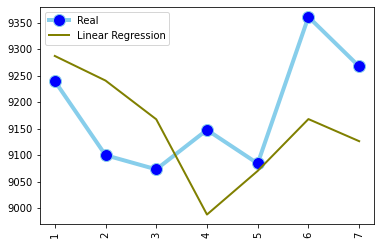

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Linear Regression', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

## Support Vector Regression - July

In [ ]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
y_train_july = pd.DataFrame(y_train_july)

In [ ]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_july)
y = sc_y.fit_transform(y_train_july)

In [ ]:
y = y[:, 0]

In [ ]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'rbf')
SVR_reg = svr_regressor.fit(X, y)

In [ ]:
# Predict the model on the x_test data
x_test_july = sc_X.fit_transform(x_test_july)

y_pred_july_svr = SVR_reg.predict(x_test_july)
y_pred_july_svr = sc_y.inverse_transform(y_pred_july_svr) 


y_pred_july_svr = pd.DataFrame(y_pred_july_svr)
y_pred_july_svr['index'] = range(1,8)

In [ ]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_svr, on='index', how='left')

In [ ]:
merge_july.columns = ['Real', 'index', 'Random Forest', 'Linear Regression', 'Support Vector Regression']

In [ ]:
#merge_july['Average'] = (merge_july['lm_prediction'] + merge_july['random_forest'])/2

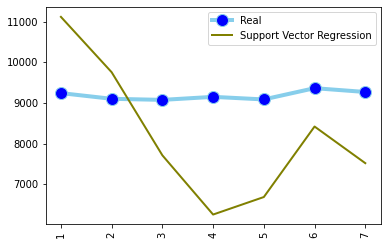

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Support Vector Regression', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

In [ ]:
MSE = mean_squared_error(y_true = merge_july.Real, y_pred = merge_july['Support Vector Regression'])
np.sqrt(MSE)

1847.1119534239726

## Vanilla Neural Network - July



In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardise the two data sets as a neural network requires standardised data

scaled_X_train = scale(x_train_july)
scaled_X_test = scale(x_test_july)
scaled_y_train = scale(y_train_july)
scaled_y_test = scale(y_test_july)

In [ ]:
# Set the seed for the modelling exercises in order to get reproducible results

tf.random.set_seed(168)
np.random.seed(168)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Create a sequential model 

model = tf.keras.Sequential()

In [ ]:
# create the architecture for the neural network

layer1 = Dense(512, activation='relu', input_shape=[9])

layer2 = Dense(512, activation='relu')

layer3 = Dense(512, activation='relu')

layer4 = Dense(512, activation='relu')

#layer5 = Dense(512, activation='relu')

top_layer = Dense(1)

In [ ]:
# Add the layers into the model

model.add(layer1)
model.add(Dropout(0.5))
model.add(layer2)
model.add(Dropout(0.5))
model.add(layer3)
model.add(Dropout(0.5))
model.add(layer4)
model.add(Dropout(0.5))
#model.add(layer5)
#model.add(Dropout(0.5))
model.add(top_layer)

In [ ]:
# Specify the optimizer to be used during the back propgation
optimizer = tf.keras.optimizers.Adam(0.0001)

In [ ]:
# Compile the model architecture

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [ ]:
# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               5120      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

In [ ]:
history = model.fit(scaled_X_train, y_train_july, epochs=250, validation_split = 0.2)

Epoch 1/250
29/29 [==============================] - 0s 6ms/step - loss: 59914184.0000 - val_loss: 69682912.0000
Epoch 2/250
29/29 [==============================] - 0s 3ms/step - loss: 59862288.0000 - val_loss: 69606168.0000
Epoch 3/250
29/29 [==============================] - 0s 3ms/step - loss: 59563904.0000 - val_loss: 69075808.0000
Epoch 4/250
29/29 [==============================] - 0s 3ms/step - loss: 57974712.0000 - val_loss: 66398612.0000
Epoch 5/250
29/29 [==============================] - 0s 3ms/step - loss: 51616876.0000 - val_loss: 57627588.0000
Epoch 6/250
29/29 [==============================] - 0s 3ms/step - loss: 36303912.0000 - val_loss: 38713848.0000
Epoch 7/250
29/29 [==============================] - 0s 3ms/step - loss: 20250960.0000 - val_loss: 18268678.0000
Epoch 8/250
29/29 [==============================] - 0s 3ms/step - loss: 14597433.0000 - val_loss: 9207763.0000
Epoch 9/250
29/29 [==============================] - 0s 3ms/step - loss: 11744910.0000 - val_loss

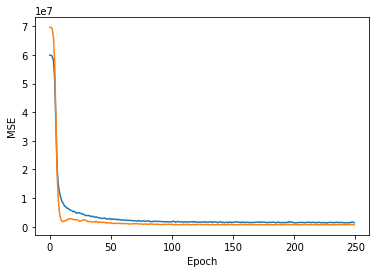

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='MSE training')
plt.plot(history.history['val_loss'], label='MSE validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Make a prediction
vnn_july = model.predict(scaled_X_test)

In [ ]:
preds_july = pd.DataFrame(vnn_july)
preds_july['index'] = range(1,8)
preds_july.columns = ['Vanilla Neural Network', 'index']

preds_july

,Vanilla Neural Network,index
0,10496.057617,1
1,9531.294922,2
2,7934.310547,3
3,3468.798096,4
4,6174.896484,5
5,8252.777344,6
6,6920.799805,7


In [ ]:
merge_july = merge_july.merge(preds_july, on = 'index')
merge_july

,Real,index,Random Forest,Linear Regression,Support Vector Regression,Vanilla Neural Network
0,9239.900000,1,9358.556615,9287.319380,11114.335817,10496.057617
1,9100.000000,2,9355.105595,9240.831789,9753.279073,9531.294922
2,9073.200000,3,9040.928148,9167.753549,7710.265580,7934.310547
3,9147.700000,4,9310.468898,8987.913877,6254.006371,3468.798096
4,9084.284734,5,9225.886957,9070.336208,6684.506516,6174.896484
5,9361.100000,6,9221.871196,9168.129820,8418.032689,8252.777344
6,9267.514949,7,9154.202517,9126.409153,7517.340586,6920.799805


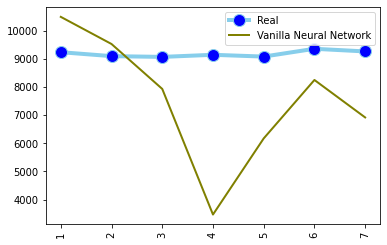

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'Real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'Vanilla Neural Network', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

In [ ]:
MSE = mean_squared_error(y_true = merge_july.Real, y_pred = merge_july['Vanilla Neural Network'])
np.sqrt(MSE)

2686.2330066181767